In [50]:
import numpy as np
import pylab as plt

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

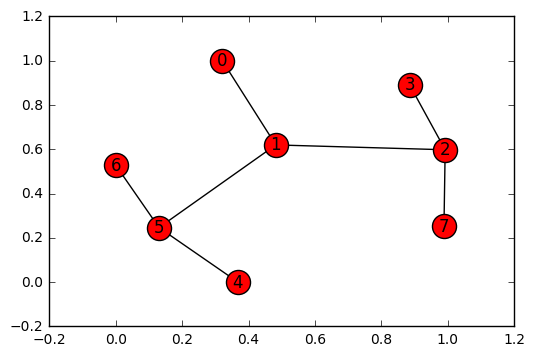

In [51]:
goal = 7

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [52]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [53]:
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [54]:
[(1,5)[::-1]] 
#(1,5)[0]

[(5, 1)]

In [55]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[  -1.,    0.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
        [   0.,   -1.,    0.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,   -1.,    0.,   -1.,   -1.,   -1.,  100.],
        [  -1.,   -1.,    0.,   -1.,   -1.,   -1.,   -1.,   -1.],
        [  -1.,   -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,   -1.,   -1.,    0.,   -1.,    0.,   -1.],
        [  -1.,   -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,   -1.,    0.,   -1.,   -1.,   -1.,   -1.,  100.]])

In [56]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    #Gets state row from reward matrix
    current_state_row = R[state,]
    
    #Available actions that are greater than 0
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    #Randomly choose an action from available actions
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
    #Gets the index of the maximum Q value - could return a matrix 
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
    #If it is a matrix, randomly choose best choice and get index
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        #If not a matrix, then get index
        max_index = int(max_index)
    
    #Gets the Q value from Q matrix
    max_value = Q[action, max_index]
    
    #Update Q matrix 
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)
  
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

In [57]:
current_state_row = R[1,]
current_state_row
av_act = np.where(current_state_row >= 0)[1]
av_act


array([0, 2, 5], dtype=int64)

In [58]:
# Training
scores = []
for i in range(800):
    #Randomly choose initial state
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:
    
    #While the agent does not get to the goal, then pick max Q value to determine next step 
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 100.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 80.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 80.0
Score: 360.0
max_value 0.0
Score: 360.0
max_value 64.0
Score: 424.0
max_value 64.0
Score: 424.0
max_value 64.0
Score: 424.0
max_value 80.0
Score: 424.0
max_value 80.0
Score: 424.0
max_value 80.0
Score: 504.0
max_value 0.0
Score: 504.0
max_value 0.0
Score: 504.0
max_value 80.0
Score: 504.0
max_value 0.0
Score: 504.0
max_value 0.0
Score: 504.0
max_value 64.0
Score: 568.0
max_value 51.2
Score: 619.2
max_value 0.0
Score: 619.2
max_value 64.0
Score: 683.2
max_value 180.0
Score: 424.0
max_value 51.2
Score: 424.0
max_value 51.2
Score: 424.0
max_value 144.0
Score: 459.555555556
max_value 180.0
Score: 504.0
max_value 51.2
Score: 5

Most efficient path:
[0, 1, 2, 7]


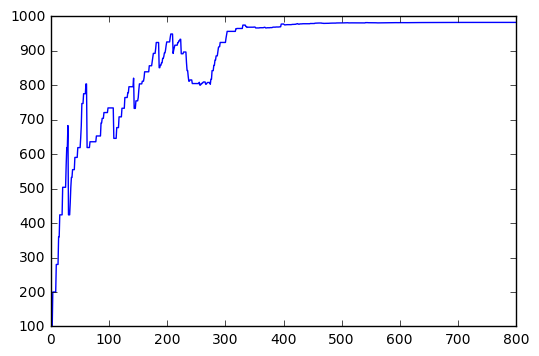

In [59]:
print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()